# 📝 Exercise M5.02

The aim of this exercise is to find out whether a decision tree
model is able to extrapolate.

By extrapolation, we refer to values predicted by a model outside of the
range of feature values seen during the training.

We will first load the regression data.

In [1]:
import pandas as pd

penguins = pd.read_csv("../datasets/penguins_regression.csv")

feature_name = "Flipper Length (mm)"
target_name = "Body Mass (g)"
data_train, target_train = penguins[[feature_name]], penguins[target_name]

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">If you want a deeper overview regarding this dataset, you can refer to the
Appendix - Datasets description section at the end of this MOOC.</p>
</div>

First, create two models, a linear regression model and a decision tree
regression model, and fit them on the training data. Limit the depth at
3 levels for the decision tree.

In [2]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(data_train, target_train)

from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=3)
tree.fit(data_train, target_train)

DecisionTreeRegressor(max_depth=3)

Create a synthetic dataset containing all possible flipper length from
the minimum to the maximum of the training dataset. Get the predictions of
each model using this dataset.

In [3]:
import numpy as np

data_test = pd.DataFrame(np.arange(data_train[feature_name].min(),
                                   data_train[feature_name].max()),
                                   columns=[feature_name])

In [7]:
data_test

,Flipper Length (mm)
0,172.0
1,173.0
2,174.0
3,175.0
4,176.0
5,177.0
6,178.0
7,179.0
8,180.0
9,181.0


In [4]:
linear_predict = linear_model.predict(data_test)
tree_predict = tree.predict(data_test)

Create a scatter plot containing the training samples and superimpose the
predictions of both models on the top.

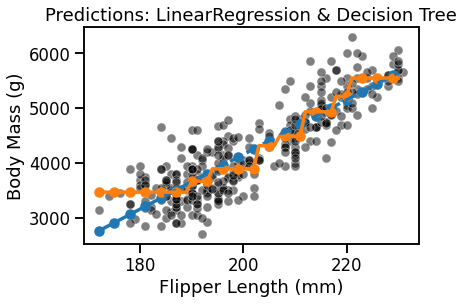

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.scatterplot(data=penguins, x=feature_name, y=target_name,
                     color="black", alpha=0.5)

plt.plot(data_test[feature_name], linear_predict, label="Linear regression",linestyle="--")

plt.scatter(data_test[::3], linear_predict[::3], label="Predictions")

plt.plot(data_test[feature_name], tree_predict, label="Decision tree")

plt.scatter(data_test[::3], tree_predict[::3], label="Predictions")

# plt.legend()
_ = plt.title("Predictions: LinearRegression & Decision Tree")

Now, we will check the extrapolation capabilities of each model. Create a
dataset containing a broader range of values than your previous dataset,
in other words, add values below and above the minimum and the maximum of
the flipper length seen during training.

In [14]:
high_range = np.arange(data_train[feature_name].max(), 250)
low_range = np.arange(152, data_train[feature_name].min())

In [19]:
hl_array = np.concatenate((high_range, low_range))
high_low = pd.DataFrame(hl_array, columns=[feature_name])
high_low

,Flipper Length (mm)
0,231.0
1,232.0
2,233.0
3,234.0
4,235.0
5,236.0
6,237.0
7,238.0
8,239.0
9,240.0


Finally, make predictions with both models on this new interval of data.
Repeat the plotting of the previous exercise.

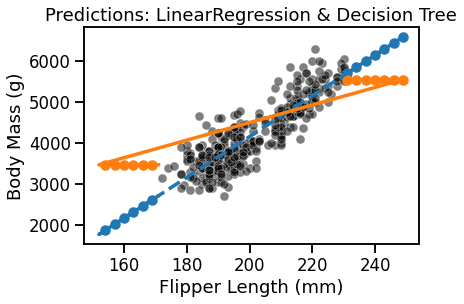

In [20]:
linear_predict = linear_model.predict(high_low)
tree_predict = tree.predict(high_low)

ax = sns.scatterplot(data=penguins, x=feature_name, y=target_name,
                     color="black", alpha=0.5)

plt.plot(high_low[feature_name], linear_predict, label="Linear regression",linestyle="--")

plt.scatter(high_low[::3], linear_predict[::3], label="Predictions")

plt.plot(high_low[feature_name], tree_predict, label="Decision tree")

plt.scatter(high_low[::3], tree_predict[::3], label="Predictions")

# plt.legend()
_ = plt.title("Predictions: LinearRegression & Decision Tree")